# Ollama RAG exercises

Just some code to learn more about RAG. Don't expect too much of it, it's just fun! 

### Contents
1. Learn the theory of cosines similarity
2. Create embeddings with ollama.
3. Calculate cosine similarity between two sentences
4. Convert a pdf to text

## 1. Learn theory of cosine similarity

In [1]:
#Define two points

# Choose values [1-10] (integers/floats) to properly plot it below
# point 1
p1x = 4
p1y = 3

#point 2
p2x = 3
p2y = 4

In [2]:
#function to calculate cosine similarity
def cosine_similarity(a, b):
    dot_product = sum(x * y for x, y in zip(a, b))
    magnitude_a = sum(x * x for x in a) ** 0.5
    magnitude_b = sum(x * x for x in b) ** 0.5
    cos_sim = dot_product / (magnitude_a * magnitude_b)
    return cos_sim

p1x, p1y = 1, 2  # Example values for the first vector
p2x, p2y = 3, 4  # Example values for the second vector

result = cosine_similarity((p1x, p1y), (p2x, p2y))
print(result)

0.9838699100999074


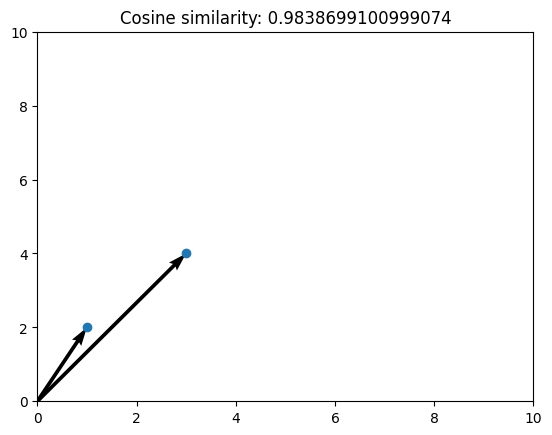

In [3]:
#plot the points and create a vector from 0,0
%matplotlib inline
import matplotlib.pyplot as plt 

#get points and plot them
points_x = p1x, p2x
points_y = p1y, p2y
plt.plot(points_x, points_y, 'o') 

#plot vectors 
plt.quiver([0, 0], [0, 0], [p1x, p2x], [p1y,p2y], angles='xy', scale_units='xy', scale=1)

#plot axes and show it
plt.title(f'Cosine similarity: {result}')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

### Exercise 1: 
1. play with the points and see what happens
2. create two examples:
    - Where cosine similarity is 1
    - Where cosine similarity is 0

## 2. Create embeddings with ollama. Compare two models in speed.

In [4]:
#check if you have to nomic-embed-text
!ollama list

NAME                            	ID          	SIZE  	MODIFIED     
llava:latest                    	8dd30f6b0cb1	4.7 GB	12 days ago 	
nomic-embed-text:latest         	0a109f422b47	274 MB	3 weeks ago 	
bramvanroy/fietje-2b-chat:Q3_K_M	6dd6525c1e6c	1.4 GB	3 weeks ago 	
mistral:latest                  	61e88e884507	4.1 GB	3 weeks ago 	
tinyllama:latest                	2644915ede35	637 MB	4 months ago	


In [5]:
%%time
import ollama
ollama.embeddings(model='mistral', prompt='The dog ran fast')

CPU times: user 178 ms, sys: 80.2 ms, total: 258 ms
Wall time: 35 s


{'embedding': [11.431639671325684,
  3.544231653213501,
  -1.106918454170227,
  4.004763603210449,
  5.365742206573486,
  -2.406923294067383,
  -3.4949405193328857,
  7.587218761444092,
  -1.8361834287643433,
  -3.0675888061523438,
  0.36008748412132263,
  -1.7788317203521729,
  0.9328023195266724,
  6.9177565574646,
  1.8435193300247192,
  -5.257628917694092,
  -6.054622173309326,
  -3.472109079360962,
  3.6425788402557373,
  1.893931269645691,
  2.5078177452087402,
  -2.273056983947754,
  -0.6021896004676819,
  3.2229857444763184,
  -10.368236541748047,
  -8.19961166381836,
  -2.2583000659942627,
  -13.680386543273926,
  3.9005494117736816,
  -1.7455397844314575,
  -3.8200910091400146,
  -2.9271435737609863,
  3.115286350250244,
  0.5505885481834412,
  -1.3508365154266357,
  -3.0127758979797363,
  0.1425732523202896,
  0.010346248745918274,
  -0.5541189908981323,
  8.441024780273438,
  0.4676221013069153,
  -2.2938406467437744,
  -6.220666408538818,
  -1.493468165397644,
  -2.9382395

In [6]:
%%time
import ollama
ollama.embeddings(model='nomic-embed-text', prompt='The dog ran fast')

CPU times: user 2.88 ms, sys: 3.33 ms, total: 6.21 ms
Wall time: 1.67 s


{'embedding': [0.40446895360946655,
  0.6106475591659546,
  -5.644669055938721,
  -0.06554435193538666,
  0.7690985202789307,
  0.06862721592187881,
  0.09247830510139465,
  0.7127407789230347,
  -0.684274435043335,
  -0.4257010519504547,
  -0.6070396900177002,
  1.8952254056930542,
  1.0351669788360596,
  0.0975787341594696,
  0.6858289241790771,
  -0.9645713567733765,
  -0.8586843013763428,
  -1.3419716358184814,
  -0.3497227430343628,
  -0.04679189249873161,
  0.15474331378936768,
  -0.4915054738521576,
  -0.3899460732936859,
  0.9561522603034973,
  4.595326900482178,
  0.9387974739074707,
  -0.06903612613677979,
  1.1395362615585327,
  0.12280653417110443,
  1.4765467643737793,
  0.009458951652050018,
  -0.7913215160369873,
  -0.38849741220474243,
  -0.5160162448883057,
  -0.5036724209785461,
  -0.7105352878570557,
  0.5259644985198975,
  0.7872586846351624,
  0.8942833542823792,
  0.03218693658709526,
  0.12036190927028656,
  -0.39541083574295044,
  -0.4490046501159668,
  -0.41548

## 3. Calculate cosine similarity between to sentences

In [7]:
!pip install torch

In [8]:
import ollama
import torch
embeddings_dict = ollama.embeddings(model='nomic-embed-text', prompt='The dog ran fast')
#embeddings_0 = embeddings_dict['embedding']
embeddings_0 = torch.tensor(embeddings_dict['embedding'])
print(len(embeddings_0))
print(embeddings_0)

768
tensor([ 4.0447e-01,  6.1065e-01, -5.6447e+00, -6.5544e-02,  7.6910e-01,
         6.8627e-02,  9.2478e-02,  7.1274e-01, -6.8427e-01, -4.2570e-01,
        -6.0704e-01,  1.8952e+00,  1.0352e+00,  9.7579e-02,  6.8583e-01,
        -9.6457e-01, -8.5868e-01, -1.3420e+00, -3.4972e-01, -4.6792e-02,
         1.5474e-01, -4.9151e-01, -3.8995e-01,  9.5615e-01,  4.5953e+00,
         9.3880e-01, -6.9036e-02,  1.1395e+00,  1.2281e-01,  1.4765e+00,
         9.4590e-03, -7.9132e-01, -3.8850e-01, -5.1602e-01, -5.0367e-01,
        -7.1054e-01,  5.2596e-01,  7.8726e-01,  8.9428e-01,  3.2187e-02,
         1.2036e-01, -3.9541e-01, -4.4900e-01, -4.1549e-01,  1.1937e+00,
        -8.7511e-01,  1.2031e-01,  5.8941e-01,  5.0423e-01, -3.6250e-01,
        -8.8266e-02, -5.4213e-01,  1.5562e-01, -1.7387e+00,  2.0379e-01,
         2.8555e-01,  8.3103e-01, -5.8885e-01, -3.4069e-01,  2.0178e-01,
         5.5044e-01,  6.6708e-01, -2.6057e-01,  8.3464e-01,  8.8619e-01,
        -2.2860e+00, -9.3235e-01,  7.7430e-01, 

In [9]:
%%time
import ollama
embeddings_dict = ollama.embeddings(model='nomic-embed-text', prompt='The cat ran fast')
embeddings_1 = torch.tensor(embeddings_dict['embedding'])
print(len(embeddings_1))
print(embeddings_1)

768
tensor([ 4.2110e-01,  6.6635e-01, -5.0505e+00, -1.9031e-01,  1.1473e+00,
         2.0951e-01,  5.1880e-01,  4.4031e-01, -1.4749e+00,  2.0616e-01,
        -5.9510e-01,  2.2953e+00,  4.6167e-01, -4.2906e-01,  8.7373e-01,
        -1.3725e+00, -9.1714e-01, -7.1614e-01, -3.0354e-01, -1.6448e-01,
         7.4766e-03, -9.7808e-01, -4.0316e-01,  9.2544e-01,  1.7428e+00,
         7.3068e-01,  4.2925e-02,  8.6875e-01, -2.6145e-01,  1.6886e+00,
        -8.8135e-02, -1.0700e+00,  1.2055e-01, -4.9429e-01, -6.6349e-01,
        -7.2826e-01,  5.0264e-01,  9.4046e-01,  6.5916e-01, -5.1168e-01,
         5.6753e-02,  1.5958e-01, -8.9299e-01, -7.3276e-01,  1.0355e+00,
        -1.4667e+00, -1.5041e-01,  5.4064e-01,  2.2586e-01, -1.1992e+00,
        -1.3947e-02, -2.2479e-02,  1.5459e-01, -1.6186e+00,  6.6384e-02,
         1.1639e+00,  1.6904e+00, -1.2976e+00, -4.1743e-01, -3.9385e-02,
         1.7161e-01,  9.3485e-01, -1.1881e-01,  6.4385e-01,  4.0669e-01,
        -2.2116e+00, -1.1474e+00,  1.1536e+00, 

In [10]:
import torch
#calculate the cosine similarity
cos = torch.nn.CosineSimilarity(dim=0)

similarity = cos(embeddings_0,embeddings_1).item()
similarity = (similarity+1)/2

print("Cosines similarity two sentences: ", similarity)

Cosines similarity two sentences:  0.9390218257904053


## 4. Convert a .pdf to .txt

In [11]:
!pip install PyPDF2

In [12]:
from PyPDF2 import PdfReader

In [13]:
import wget
document = wget.download('https://assets.scriptslug.com/live/pdf/scripts/pulp-fiction-1994.pdf')
document

'pulp-fiction-1994 (1).pdf'

In [14]:
# Select the .pdf file to read 
reader = PdfReader('./pulp-fiction-1994.pdf')
reader

In [15]:
# read data from the file and put them into a variable called raw_text
raw_text = ''
for i, page in enumerate(reader.pages):
    text = page.extract_text()
    if text:
        raw_text += text
print(raw_text[:200])
print(50 * '-')
print(f'The text is {len(raw_text)} characters')

PULP FICTION
by
Quentin Tarantino & Roger AvaryPULP [pulp] n.
1. A soft, moist, shapeless
mass or matter.
2. A magazine or book containing lurid
subject matter and being characteristically
printed on 
--------------------------------------------------
The text is 152213 characters


In [16]:
#save raw_text to a .txt file
file = open("pulp_fiction.txt", "w") #w for write
file.write(raw_text)
file.close()